In [ ]:
import json
import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import pyLDAvis
from gensim.corpora import Dictionary, MmCorpus
import nltk

# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


import preprocessor as p # 
import string # use string.punctuation to clean out punctuation

from pprint import pprint

from datetime import datetime
import pickle



from tqdm import tqdm

pd.set_option('display.max_colwidth', -1)
%matplotlib inline

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
with open("clean_tweets_sample.pkl", 'rb') as picklefile: 
    sampleDF = pickle.load(picklefile)

In [4]:
with open("clean_tweets_full.pkl", 'rb') as picklefile: 
    fullDF = pickle.load(picklefile)

In [5]:
def just_text(tweetsDF):
    cleanDF = pd.DataFrame(columns = ['id','full_text'])
    cleanDF['full_text'] = tweetsDF['full_text']
    cleanDF.drop('id',axis = 1).head()
    return cleanDF

In [6]:
sampletextDF = just_text(sampleDF)

In [7]:
sampleDF

,user,created_at,full_text,truncated,contains_url,favorite_count,location,time_zone,following_count,followers_count,retweet_count,Polarity,Subjectivity
0,MartinKACrook,2018-02-28 22:32:24+00:00,population control will not reverse or mitigate climate change here is the logic and evidence populationcontrollaw,False,1,0,None,Amsterdam,94,71,0,0.000000,0.000000
1,AggieHJ,2018-02-28 22:32:06+00:00,i see climate change deniers are out in force today due to the cold weather in europe they still haven t bothered to research the issue properly and are still hung up on the global warming meaning climatechangeisreal,False,1,0,None,None,218,307,0,-0.181250,0.368750
2,MadonnaMadsen,2018-02-28 22:32:00+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,Central Time (US & Canada),10202,10713,3,0.000000,0.150000
3,hackneywick,2018-02-28 22:31:58+00:00,and yes it s consistent with climate change warming at the poles weakens the jetstream which blows warm air from the west and allows colder air in from the east,False,1,0,None,London,7031,8057,2,0.425000,0.425000
4,ONGYEWKHOON5,2018-02-28 22:31:19+00:00,can lee s l do something to safe the global warming and climate changes,False,1,0,Singapore,None,3896,806,0,0.250000,0.250000
5,munkihanger,2018-02-28 22:31:16+00:00,john ashton trying to elain to mayhem and co in necessarily very simple terms that allowing fracking won t help reduce global warming and catastrophic climate breakdown wonder if they ll get the message best keep on with nvda until they do roll on the united resistance,False,1,0,None,None,222,346,4,0.333333,0.254762
6,tlane04,2018-02-28 22:30:31+00:00,it might seem counterintuitive but global warming plays a role in blasts of bitter cold weather the reason it influences the jet stream here s how,False,1,0,None,None,474,56,153,-0.233333,0.500000
7,rcjhawk86,2018-02-28 22:29:50+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,6380,6295,3,0.000000,0.150000
8,bestdoxiemom,2018-02-28 22:29:47+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,4991,4951,3,0.000000,0.150000
9,yergnflergn,2018-02-28 22:29:34+00:00,if you want to research the soyboy epidemic causes just allege a link and possible solution to global warming sorry climate change in the research grant application maybe study the combined potential of estrogen and soy flatulence to absorb co and bam the money s in the bank,False,0,0,None,None,313,197,0,-0.125000,0.750000


In [8]:
fulltextDF = just_text(fullDF)

# LDA Topic Modelling

Add column with topic for document

In [508]:
def nltk_stopwords():
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['change','global','even', 'warming', 'climate', 'climatechange', 'globalwarming', 'climate change', 'global warming', 'new', 'means']
    stopwords.extend(newStopWords)
    
    return stopwords

In [10]:
def print_top_words(model, feature_names, n_top_words = 20):
   #"""Print top words in each topic."""
    for topic_idx, topic in enumerate(model.components_):
        print ("\nTopic #%d:" % topic_idx)
        print (", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [11]:
def get_topics_lda(df, n_topics):  
    count_vect = CountVectorizer(analyzer = "word",
                                      stop_words = nltk_stopwords(),
                                      #max_features = 1000,
                                      max_df = 0.7,
                                      min_df = 2)
    matrix = count_vect.fit_transform(df)
    vocab = count_vect.get_feature_names()


   # fit transform lda
    lda = LatentDirichletAllocation(n_components=n_topics,
               learning_method='online', learning_offset=50., max_iter=10,
               random_state=0)
   
    doc_topic_dists = lda.fit_transform(matrix)
   
   # print topic words
   #print "\nTopics in LDA model:", cand
    print_top_words(lda, vocab)
   
   # prepare pyLDAvis
    get_normed = lambda data: pd.DataFrame(data).div(data.sum(axis = 1), axis = 0)
    prepared = pyLDAvis.prepare(
           doc_lengths = df.str.len(),
           vocab = vocab,
           term_frequency = np.asarray(matrix.sum(axis = 0)).ravel().tolist(),
           topic_term_dists = get_normed(lda.components_), # topics x terms
           doc_topic_dists = get_normed(doc_topic_dists)) # docs x topics
   
    return lda, doc_topic_dists, prepared, vocab

In [12]:
def get_word_freq(topic, model, n_top_words, vocab):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    
    word_dict = {};
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

In [13]:
def get_doc_topics(doc_topic_dist):
   """Return list of topics for documents, given doc topic distribution"""
   return [np.argmax(topic) for doc, topic in enumerate(doc_topic_dist)]

## Sample

In [14]:
sampleDF.full_text

0        population control will not reverse or mitigate climate change here is the logic and evidence populationcontrollaw                                                                                                                                                                     
1        i see climate change deniers are out in force today due to the cold weather in europe they still haven t bothered to research the issue properly and are still hung up on the global warming meaning climatechangeisreal                                                               
2        convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax                    
3        and yes it s consistent with climate change warming at the poles weakens the jetstream which blows warm air from the west an

In [15]:
all_lda, all_doc_topics, all_prepared,vocab = get_topics_lda(sampleDF['full_text'], 4)


Topic #0:
changed, six, americans, minds, arctic, year, china, plant, trees, pollution, wants, address, soldiers, giving, fight, helicopter, suvs, exnknew, rides, via

Topic #1:
science, extreme, air, many, ice, weather, degrees, normal, oceans, faster, nothing, artic, denial, also, emissions, eeriencing, humans, economics, profit, would

Topic #2:
record, india, million, hours, trees, plants, part, weather, environmental, campaign, breaking, need, jet, us, stream, cold, impact, might, support, agenda

Topic #3:
world, lakes, rise, around, think, planet, levels, biggest, via, paris, drying, good, agreement, let, years, know, water, despite, could, sea


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [16]:
pyLDAvis.display(all_prepared)

In [17]:
#distribution of topics over the documents
all_doc_topics

array([[0.42135174, 0.03589358, 0.03675836, 0.50599632],
       [0.01630939, 0.25350407, 0.15242372, 0.57776283],
       [0.85681015, 0.00957194, 0.04525278, 0.08836513],
       ...,
       [0.02095378, 0.52052105, 0.1041388 , 0.35438637],
       [0.64024653, 0.09741344, 0.0184015 , 0.24393854],
       [0.54859037, 0.30483606, 0.12557625, 0.02099732]])

In [18]:
# categorize reviews by most probable topic
sampleDF['topic_LDA'] = get_doc_topics(all_doc_topics)

In [19]:
sampleDF

,user,created_at,full_text,truncated,contains_url,favorite_count,location,time_zone,following_count,followers_count,retweet_count,Polarity,Subjectivity,topic_LDA
0,MartinKACrook,2018-02-28 22:32:24+00:00,population control will not reverse or mitigate climate change here is the logic and evidence populationcontrollaw,False,1,0,None,Amsterdam,94,71,0,0.000000,0.000000,3
1,AggieHJ,2018-02-28 22:32:06+00:00,i see climate change deniers are out in force today due to the cold weather in europe they still haven t bothered to research the issue properly and are still hung up on the global warming meaning climatechangeisreal,False,1,0,None,None,218,307,0,-0.181250,0.368750,3
2,MadonnaMadsen,2018-02-28 22:32:00+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,Central Time (US & Canada),10202,10713,3,0.000000,0.150000,0
3,hackneywick,2018-02-28 22:31:58+00:00,and yes it s consistent with climate change warming at the poles weakens the jetstream which blows warm air from the west and allows colder air in from the east,False,1,0,None,London,7031,8057,2,0.425000,0.425000,1
4,ONGYEWKHOON5,2018-02-28 22:31:19+00:00,can lee s l do something to safe the global warming and climate changes,False,1,0,Singapore,None,3896,806,0,0.250000,0.250000,0
5,munkihanger,2018-02-28 22:31:16+00:00,john ashton trying to elain to mayhem and co in necessarily very simple terms that allowing fracking won t help reduce global warming and catastrophic climate breakdown wonder if they ll get the message best keep on with nvda until they do roll on the united resistance,False,1,0,None,None,222,346,4,0.333333,0.254762,2
6,tlane04,2018-02-28 22:30:31+00:00,it might seem counterintuitive but global warming plays a role in blasts of bitter cold weather the reason it influences the jet stream here s how,False,1,0,None,None,474,56,153,-0.233333,0.500000,2
7,rcjhawk86,2018-02-28 22:29:50+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,6380,6295,3,0.000000,0.150000,0
8,bestdoxiemom,2018-02-28 22:29:47+00:00,convenient truth al gore the father of global warming suggest that we tax ranchers cows passing gas he owns mansion flies around in his personal jet and leaves a carbon footprint like a herd of elephants now the dems switch the name climate change what a hoax,False,1,0,None,None,4991,4951,3,0.000000,0.150000,0
9,yergnflergn,2018-02-28 22:29:34+00:00,if you want to research the soyboy epidemic causes just allege a link and possible solution to global warming sorry climate change in the research grant application maybe study the combined potential of estrogen and soy flatulence to absorb co and bam the money s in the bank,False,0,0,None,None,313,197,0,-0.125000,0.750000,2


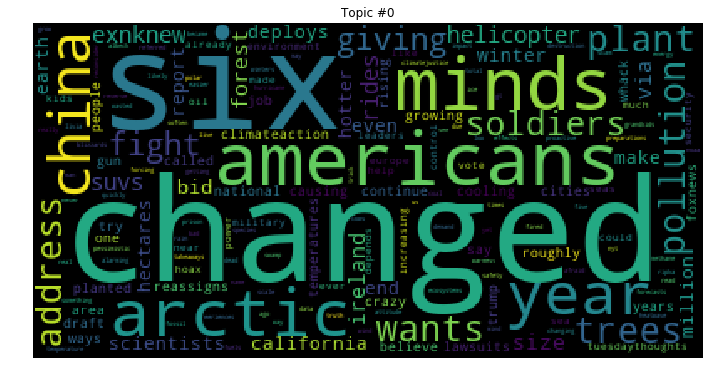

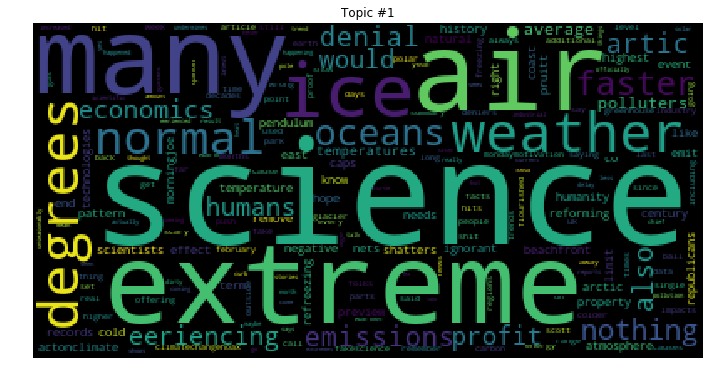

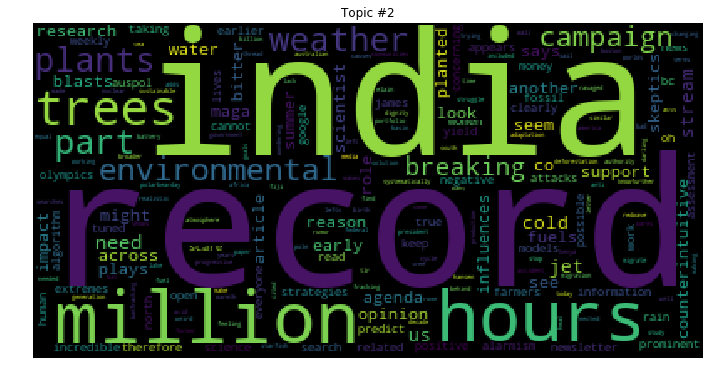

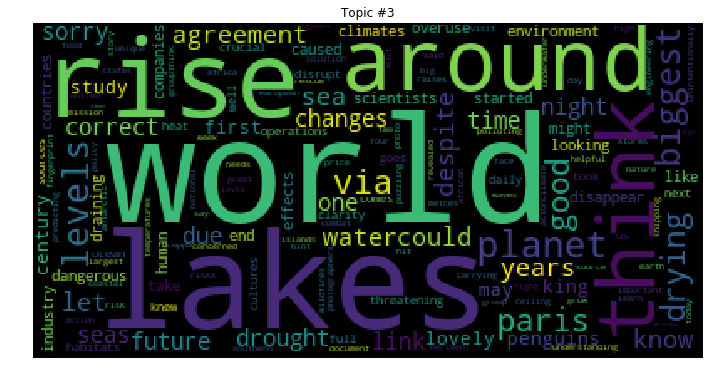

In [20]:
for t in range(4):
    plt.figure(figsize = (12,16))
    plt.imshow(WordCloud().fit_words(dict(get_word_freq(t, all_lda, 200, vocab))))
    plt.axis('off')
    plt.title('Topic #' + str(t))
    plt.show();

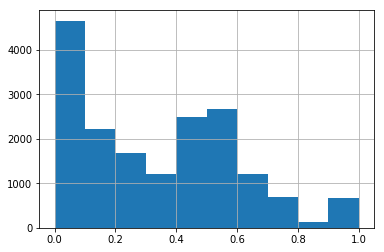

In [21]:
sampleDF.Subjectivity.hist()

In [22]:
sampleDF[sampleDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count()

topic_LDA
0    3439
1    3013
2    1835
3    3328
Name: Polarity, dtype: int64

In [23]:
sampleDF[sampleDF.Polarity >= 0.1].groupby('topic_LDA')['Polarity'].count()

topic_LDA
0    2289
1    1554
2    332 
3    1789
Name: Polarity, dtype: int64

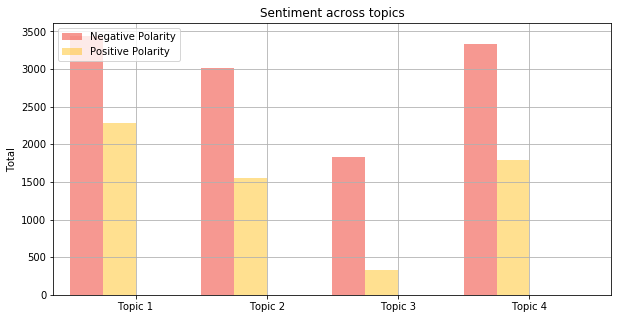

In [24]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        sampleDF[sampleDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        sampleDF[sampleDF.Polarity >= 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Sentiment across topics')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)


# Adding the legend and showing the plot
plt.legend(['Negative Polarity', 'Positive Polarity'], loc='upper left')
plt.grid()
plt.show()

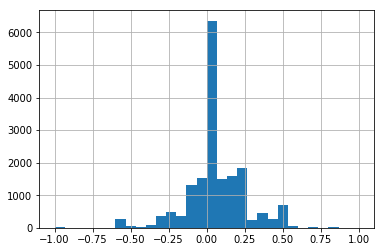

In [25]:
sampleDF.Polarity.hist(bins = 30)

## Full Set

In [509]:
all_lda, all_doc_topics, all_prepared, vocab = get_topics_lda(fullDF['full_text'], 4)


Topic #0:
trees, million, record, hours, india, part, plants, environmental, campaign, breaking, world, future, penguins, king, end, around, looking, might, century, companies

Topic #1:
arctic, scientists, winter, heatwave, forcing, forecasts, reconsider, pessimistic, see, alarming, ever, sunless, wanted, sentence, extreme, science, nothing, ice, degrees, normal

Topic #2:
weather, cold, became, address, wants, giving, exnknew, helicopter, suvs, rides, pro, attempt, normalize, pedophilia, jet, stream, co, snow, energy, arctic

Topic #3:
one, know, scientists, think, due, planet, world, water, venice, say, science, lakes, like, people, via, good, changed, levels, ago, also


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [510]:
all_doc_topics.shape

(180920, 4)

In [511]:
fullDF.full_text.shape

(180920,)

In [512]:
np.savetxt('./data/lda_doc_topics.tsv', all_doc_topics, delimiter='\t',newline='\n')

Xlabel = list(fullDF.full_text)
with open('./data/lda_doc_text.tsv', 'w') as file:
    for label in Xlabel:
        file.write(label+'\n')

In [513]:
pyLDAvis.display(all_prepared)

In [565]:
html_str = pyLDAvis.prepared_data_to_html(all_prepared)

In [566]:
html_file= open("pyLDAvis","w")
html_file.write(html_str)
html_file.close()

In [514]:
#distribution of topics over the documents
all_doc_topics

array([[0.22500682, 0.02527023, 0.7247229 , 0.02500005],
       [0.01162092, 0.27880979, 0.38609287, 0.32347642],
       [0.05000098, 0.05019866, 0.84565458, 0.05414577],
       ...,
       [0.0194515 , 0.01989527, 0.01925418, 0.94139904],
       [0.16383992, 0.1606708 , 0.232154  , 0.44333527],
       [0.1331277 , 0.02106366, 0.72937107, 0.11643757]])

In [515]:
# categorize reviews by most probable topic
fullDF['topic_LDA'] = get_doc_topics(all_doc_topics)

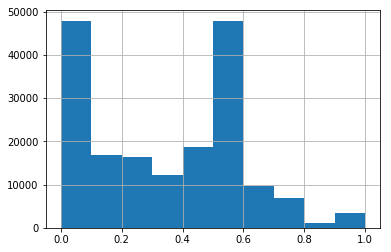

In [516]:
fullDF.Subjectivity.hist()

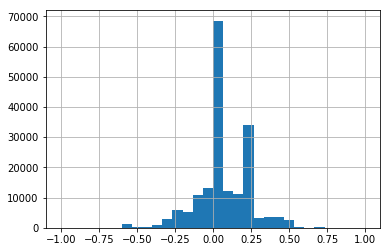

In [517]:
fullDF.Polarity.hist(bins = 30)

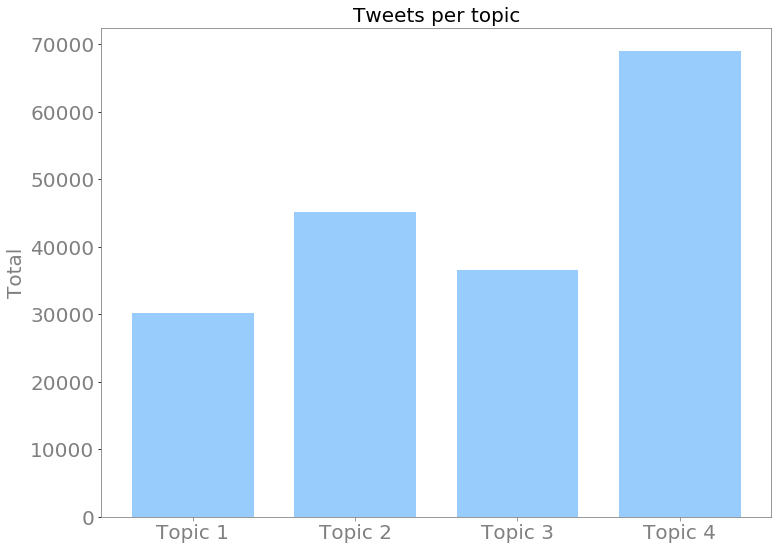

In [518]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.75 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,9))
# Create a bar with pre_score data,
# in position pos,

plt.bar(pos, 
        #using df['pre_score'] data,
        fullDF.groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.75, 
        # with color
        color='#75bbfd', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Tweets per topic')

# Set the position of the x ticks
ax.set_xticks([p for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)

ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.xaxis.label.set_color('gray')



ax.tick_params(axis='x', colors='gray')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    item.set_color('gray')
    
ax.title.set_color('black')

plt.savefig('./img/tweets_per_topic', bbox_inches = 'tight')
plt.show()

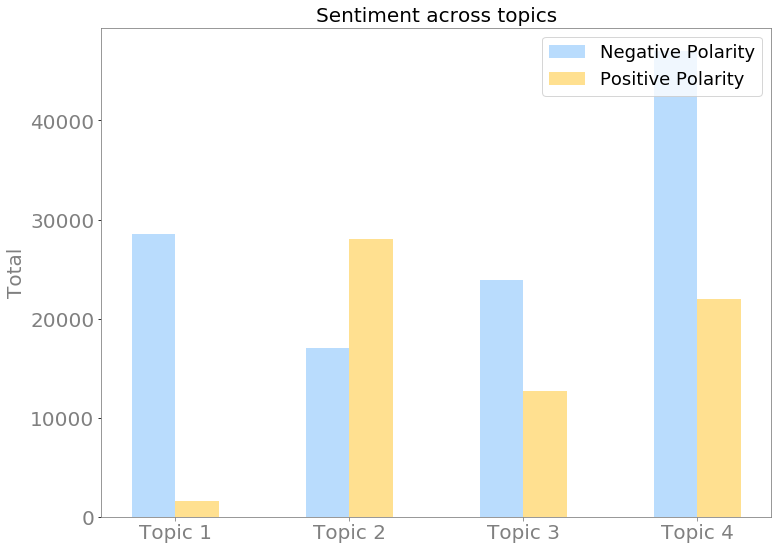

In [519]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,9))
# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        fullDF[fullDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#75bbfd', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        fullDF[fullDF.Polarity >= 0.1].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Sentiment across topics')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)

ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.xaxis.label.set_color('gray')



ax.tick_params(axis='x', colors='gray')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    item.set_color('gray')
    
ax.title.set_color('black')

# Adding the legend and showing the plot
plt.legend(['Negative Polarity', 'Positive Polarity'], loc='upper right', fontsize = 18)
plt.savefig('./img/polarity')

plt.show()

In [558]:
fullDF.groupby('topic_LDA')['retweet_count'].mean()

topic_LDA
0    271.392957
1    688.044327
2    286.410784
3    68.964975 
Name: retweet_count, dtype: float64

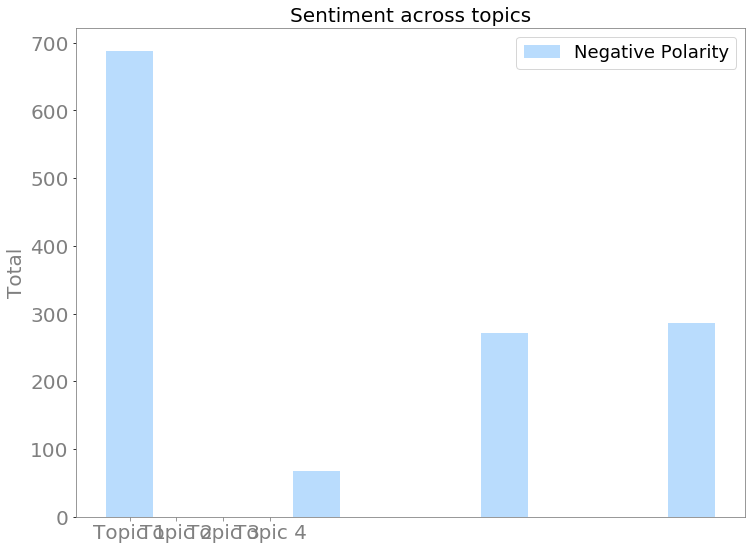

In [562]:

# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,9))
# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        [688, 68,271,286],
        #fullDF.groupby('topic_LDA').retweet_count.mean(),
        
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#75bbfd', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])



# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Sentiment across topics')

# Set the position of the x ticks
ax.set_xticks([p  * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)

ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.xaxis.label.set_color('gray')



ax.tick_params(axis='x', colors='gray')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    item.set_color('gray')
    
ax.title.set_color('black')

# Adding the legend and showing the plot
plt.legend(['Negative Polarity', 'Positive Polarity'], loc='upper right', fontsize = 18)
plt.savefig('./img/polarity')

plt.show()

In [ ]:
fullDF.head()

In [550]:
fullDF[(fullDF.topic_LDA == 3) &(fullDF.)].retweet_count.unique().mean()

1036.9545454545455

In [543]:
fullDF[fullDF.Polarity < 0.1].groupby('topic_LDA')['Polarity'].count()[[0,3]]

topic_LDA
0    28582
3    47019
Name: Polarity, dtype: int64

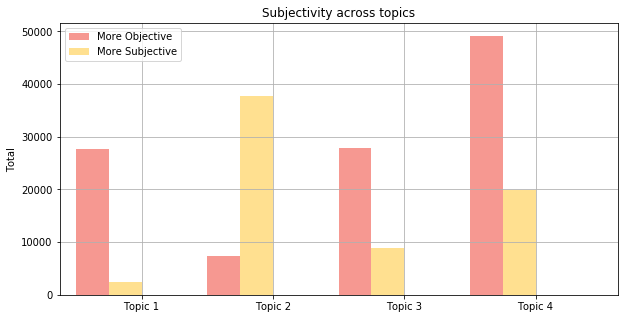

In [520]:
# Setting the positions and width for the bars
pos = list(range(4)) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        fullDF[fullDF.Subjectivity < 0.5].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

plt.bar([p + width for p in pos], 
        #using df['pre_score'] data,
        fullDF[fullDF.Subjectivity >= 0.5].groupby('topic_LDA')['Polarity'].count(), 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=['Topic 1','Topic 2', 'Topic 3', 'Topic 4'])

# Set the y axis label
ax.set_ylabel('Total')

# Set the chart's title
ax.set_title('Subjectivity across topics')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Topic 1', 'Topic 2', 'Topic 3','Topic 4'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)


# Adding the legend and showing the plot
plt.legend(['More Objective', 'More Subjective'], loc='upper left')
plt.grid()
plt.show()

In [521]:
fullDF

,user,created_at,full_text,truncated,contains_url,favorite_count,location,time_zone,following_count,followers_count,retweet_count,Polarity,Subjectivity,topic_LDA
0,onahunttoday,2018-02-28 23:33:47+00:00,memo from activist lawyer to outlines strategy to charge energy companies with causing global warming,False,1,0,None,Eastern Time (US & Canada),5000,4383,4,0.000000,0.000000,2
1,thierry_ennui_,2018-02-28 23:33:46+00:00,there s a huge difference between climate and weather the arctic is eeriencing unusually high temperatures as a result of global warming which has pushed colder air further south causing snow and very cold temperatures in britain there s reams of science behind it,False,0,0,None,Amsterdam,786,414,0,-0.103333,0.606667,2
2,RashidKhan624,2018-02-28 23:33:08+00:00,what are climate change global warming greenhouses gasses difference between weather and climate,False,1,0,None,Islamabad,293,127,0,0.000000,0.000000,2
3,RashidKhan624,2018-02-28 23:32:59+00:00,what are climate change global warming greenhouses gasses difference between weather and climate via visually disasters,False,1,0,None,Islamabad,293,127,0,0.000000,0.000000,2
4,SnowLovers2030,2018-02-28 23:32:52+00:00,east coast shatters temperature records offering preview to a warming world,False,1,1,None,Pacific Time (US & Canada),270,31,0,0.000000,0.000000,0
5,koma2jr,2018-02-28 23:32:44+00:00,india plants million trees in hours as part of record breaking environmental campaign,False,1,0,None,Pacific Time (US & Canada),173,86,564,0.000000,0.000000,0
6,t_pressland,2018-02-28 23:32:15+00:00,life inside the global warming bubble via climatism globalwarming climatechange globalcooling beastfromtheeast auspol savotes,False,1,0,None,None,156,306,4,0.000000,0.000000,2
7,Anthonytaylor14,2018-02-28 23:32:06+00:00,global warming climate change can melt polar ice caps which disturbs the gulf stream which provides warmth to north western europe without the gulf stream it creates a cooling and a freeze you really should know this,False,0,0,None,None,353,134,0,0.029167,0.112500,3
8,awhtiman,2018-02-28 23:31:02+00:00,pa oil and gas industry emits x more methane than previously thought that s the same near term climate pollution as coal fired power plants solar nearly million worth of wasted energy resources via,False,1,0,None,Quito,797,459,3,0.090476,0.241667,2
9,Dan55645,2018-02-28 23:31:02+00:00,life inside the global warming bubble via climatism globalwarming climatechange globalcooling beastfromtheeast auspol savotes,False,1,0,None,None,1777,1940,4,0.000000,0.000000,2


In [522]:
fullDF[fullDF.topic_LDA == 0].contains_url.sum()

29861

In [523]:
type(nltk_stopwords())

list

In [524]:
set([1,2,2])

{1, 2}

In [525]:
set(nltk_stopwords())

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'change',
 'climate',
 'climate change',
 'climatechange',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'even',
 'few',
 'for',
 'from',
 'further',
 'global',
 'global warming',
 'globalwarming',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'means',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'n

Topic 1

Total in Topic: 30156 %: 0.16668140614636304

Average Retweets: 203.1573033707865
Average Likes: 250.53012048192772
Number of links: 29861


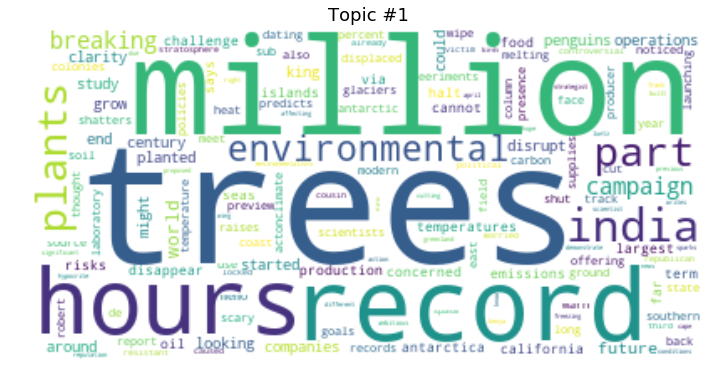

Topic 2

Total in Topic: 45097 %: 0.2492648684501437

Average Retweets: 466.5851063829787
Average Likes: 378.34615384615387
Number of links: 33316


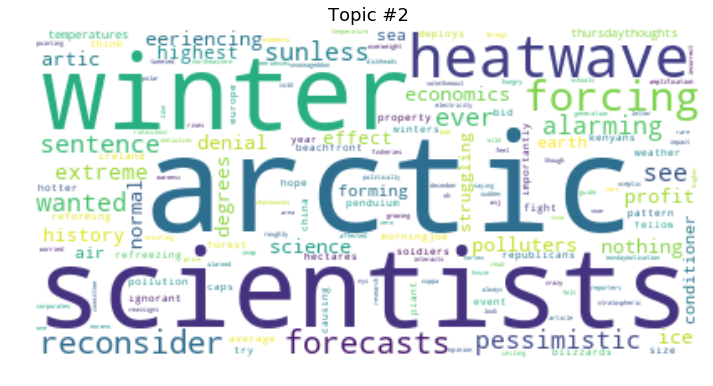

Topic 3

Total in Topic: 36630 %: 0.20246517797921734

Average Retweets: 625.5244755244755
Average Likes: 68.1264367816092
Number of links: 32042


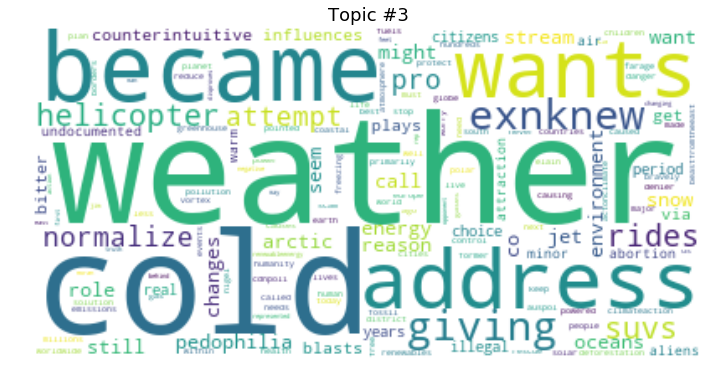

Topic 4

Total in Topic: 69037 %: 0.38158854742427595

Average Retweets: 1036.9545454545455
Average Likes: 213.0
Number of links: 54046


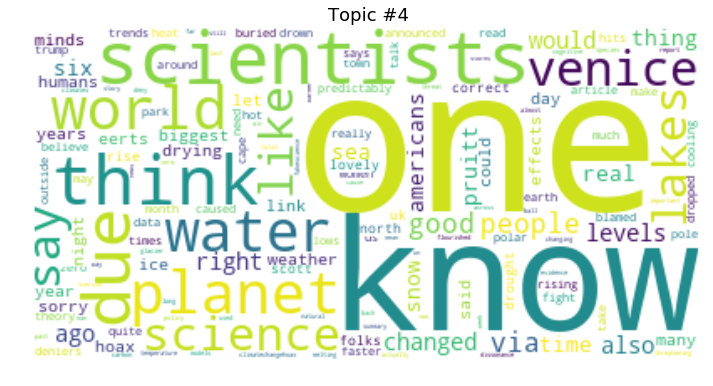

In [526]:
from PIL import Image
from wordcloud import ImageColorGenerator
earth_coloring = np.array(Image.open('./img/earth-1.en.png'))
image_colors = ImageColorGenerator(earth_coloring)

count_total = fullDF['Polarity'].count()

for t in range(4):
    plt.figure(figsize = (12,16))
    count_topic = fullDF[(fullDF.topic_LDA == t)]['Polarity'].count()
    wc = WordCloud(background_color='white', colormap = plt.cm.viridis, stopwords = {'science'}).fit_words(dict(get_word_freq(t, all_lda, 150, vocab)))
    
    print('Topic', t+1)
    print('')
    print('Total in Topic:', count_topic, '%:', count_topic/count_total)
    print('')
    print('Average Retweets:', np.mean(fullDF[fullDF.topic_LDA == t].retweet_count.unique()))
    print('Average Likes:', np.mean(fullDF[fullDF.topic_LDA == t].favorite_count.unique()))
    print('Number of links:', fullDF[fullDF.topic_LDA == t].contains_url.sum())
    
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    
    #plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'bilinear')
    #plt.axis('off')
    #plt.figure()
    #plt.imshow(earth_coloring, cmap = plt.cm.gray, interpolation = 'bilinear')
    #plt.axis('off')
    plt.title('Topic #' + str(t+1), fontsize = 18)
    plt.savefig('./img/wordcloud_topic'+str(t+1), bbox_inches = 'tight')
    plt.show();

In [308]:
fullDF[(fullDF.topic_LDA == 0)].sort_values('retweet_count', ascending = False)

,user,created_at,full_text,truncated,contains_url,favorite_count,location,time_zone,following_count,followers_count,retweet_count,Polarity,Subjectivity,topic_LDA
52971,RichesinAva,2018-02-26 19:01:40+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,1147,187,17516,0.000000,0.340000,0
60886,emmyshaff,2018-02-28 23:16:51+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,358,452,17516,0.000000,0.340000,0
57008,emmyshaff,2018-02-28 23:16:51+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,358,452,17516,0.000000,0.340000,0
60667,g_iannamarie10,2018-03-01 00:34:01+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,Pacific Time (US & Canada),216,309,17516,0.000000,0.340000,0
37324,g_iannamarie10,2018-03-01 00:34:01+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,Pacific Time (US & Canada),216,309,17516,0.000000,0.340000,0
47431,emmyshaff,2018-02-28 23:16:51+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,358,452,17516,0.000000,0.340000,0
43086,RichesinAva,2018-02-26 19:01:40+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,1147,187,17516,0.000000,0.340000,0
37543,emmyshaff,2018-02-28 23:16:51+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,358,452,17516,0.000000,0.340000,0
56789,g_iannamarie10,2018-03-01 00:34:01+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,Pacific Time (US & Canada),216,309,17516,0.000000,0.340000,0
26938,emmyshaff,2018-02-28 23:16:51+00:00,i think climate change is more complex than global warming will make it hotter it has to do with disruptions of atmospheric conditions ocean patterns jet streams and shit like that,False,0,0,None,None,358,452,17516,0.000000,0.340000,0


In [195]:
for i in range(4):
    print('Topic',i)
    print('--------------------------------')
    print(fullDF[fullDF.topic_LDA == i].sample(20).full_text)
    print('--------------------------------')

Topic 0
--------------------------------
159716    photos globalwarming melting uk into a hot desert climatechange stormemma tcot                                                                                                                                                                               
103136    it would appear mother nature is speaking a different language to that of her warmist subjects living life inside the bubble of man made global warming hysteria via climate springst auspol                                                                 
162591    europe has the beast from the east but beware its southern cousin via                                                                                                                                                                                        
81426     wants to address climatechange but not if it means giving up his suvs and helicopter rides exnknew                                                           

In [131]:
import matplotlib.gridspec as gridspec

Topic 0

Total in Topic: 62749 %: 0.3468328543002432

Average Retweets: 1153.8461538461538

Negative: 43081 %: 0.6865607420038566
Positive: 19668 %: 0.31343925799614336


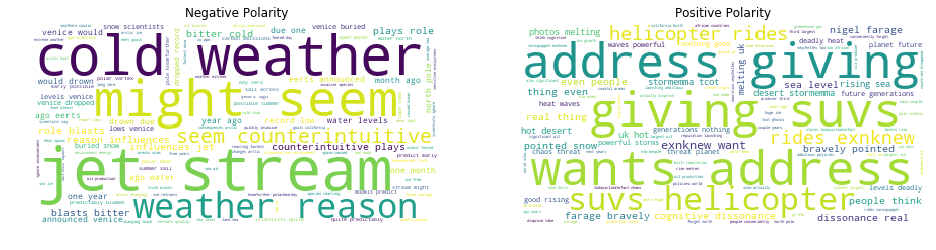

Objective: 46717 %: 0.7445058885400564
Subjective: 16032 %: 0.2554941114599436


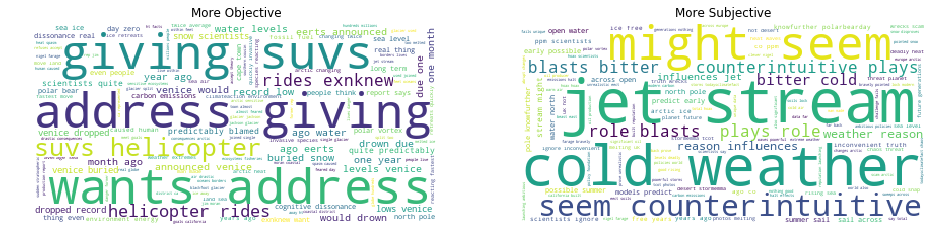

---------------------------------------------------------------
Topic 1

Total in Topic: 25533 %: 0.14112867565774928

Average Retweets: 202.29268292682926

Negative: 24196 %: 0.9476363921200016
Positive: 1337 %: 0.052363607879998435


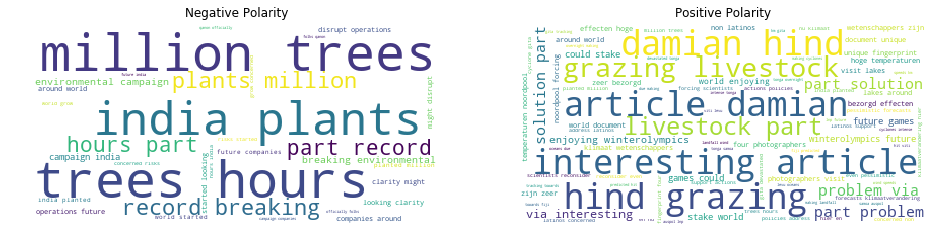

Objective: 24483 %: 0.9588767477382212
Subjective: 1050 %: 0.041123252261778875


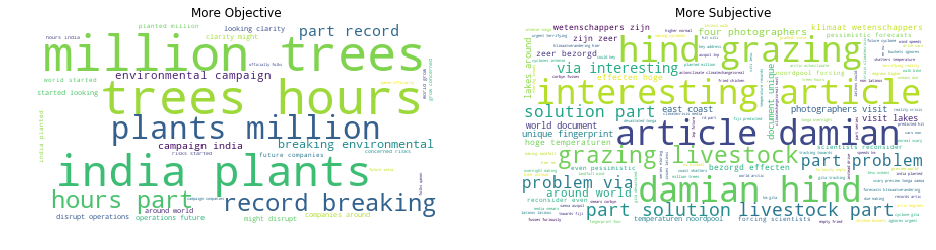

---------------------------------------------------------------
Topic 2

Total in Topic: 43909 %: 0.24269843024541235

Average Retweets: 287.8240740740741

Negative: 30996 %: 0.7059145049989751
Positive: 12913 %: 0.2940854950010248


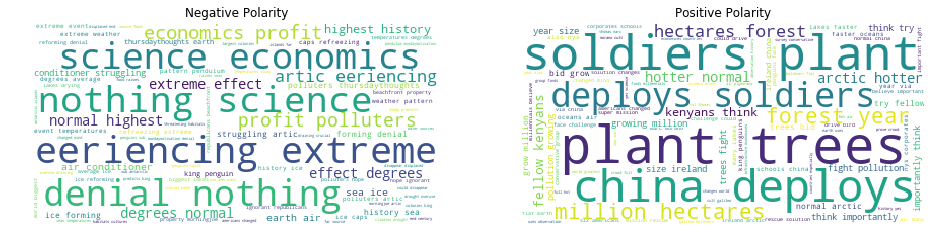

Objective: 24398 %: 0.5556491835386823
Subjective: 19511 %: 0.44435081646131774


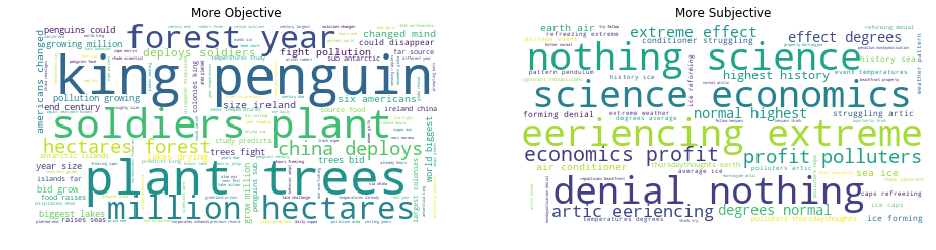

---------------------------------------------------------------
Topic 3

Total in Topic: 48729 %: 0.26934003979659515

Average Retweets: 438.9761904761905

Negative: 18302 %: 0.37558743253504073
Positive: 30427 %: 0.6244125674649592


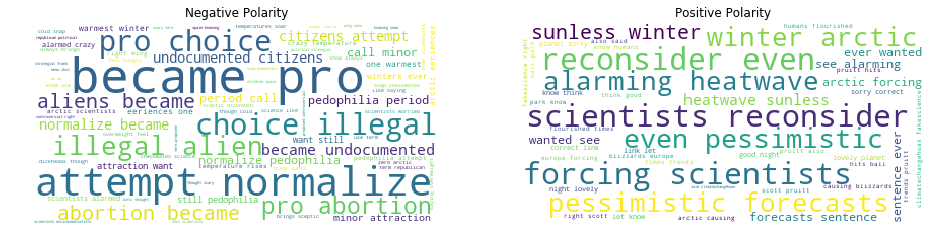

Objective: 16343 %: 0.335385499394611
Subjective: 32386 %: 0.664614500605389


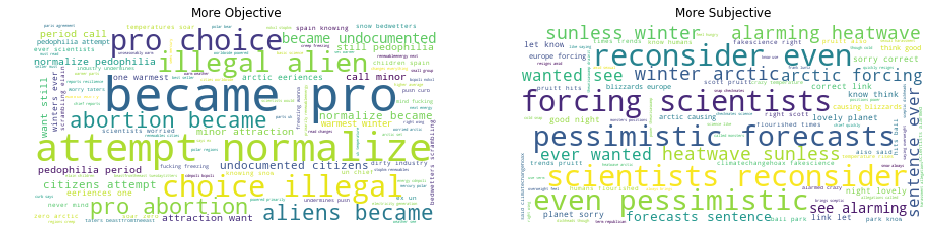

---------------------------------------------------------------


In [132]:
count_total = fullDF['Polarity'].count()

for t in range(4):
    
    count_low_polarity = fullDF[(fullDF.Polarity < 0.1) & (fullDF.topic_LDA == t)]['Polarity'].count()
    count_high_polarity = fullDF[(fullDF.Polarity >= 0.1) & (fullDF.topic_LDA == t)]['Polarity'].count()
    
    count_objective = fullDF[(fullDF.Subjectivity < 0.5) & (fullDF.topic_LDA == t)]['Polarity'].count()
    count_subjective = fullDF[(fullDF.Subjectivity >= 0.5) & (fullDF.topic_LDA == t)]['Polarity'].count()
    
    count_topic = fullDF[(fullDF.topic_LDA == t)]['Polarity'].count()
    
    print('Topic', t)
    
    print('')
    print('Total in Topic:', count_topic, '%:', count_topic/count_total)
    print('')
    print('Average Retweets:', np.mean(fullDF[fullDF.topic_LDA == t].retweet_count.unique()))
    print('')
    
    print('Negative:', count_low_polarity, '%:', count_low_polarity/count_topic)
    print('Positive:', count_high_polarity, '%:', count_high_polarity/count_topic)
    
    plt.figure(figsize = (16,16))    
    plt.subplot(1,2,1)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Polarity < 0.1)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('Negative Polarity')
    #plt.show()
               
    #plt.figure(figsize = (12,16))
    plt.subplot(1,2,2)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Polarity >= 0.1)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('Positive Polarity')
    plt.show()
    
    print('Objective:', count_objective, '%:', count_objective/count_topic)
    print('Subjective:', count_subjective, '%:', count_subjective/count_topic)
    
    plt.figure(figsize = (16,16))   
    plt.subplot(1,2,1)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Subjectivity < 0.5)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('More Objective')
    #plt.show()
               
    #plt.figure(figsize = (12,16))
    plt.subplot(1,2,2)
    plt.imshow(WordCloud(background_color='white', stopwords = nltk_stopwords()).generate(fullDF[(fullDF.Subjectivity >= 0.5)&(fullDF.topic_LDA == t)].full_text.str.cat(sep=' ')))
    plt.axis('off')
    plt.title('More Subjective')
    plt.show()
    
    print('---------------------------------------------------------------')

In [133]:
fullDF[(fullDF.Polarity >= 0.1) & (fullDF.topic_LDA == 0)]['Polarity'].count()

19668

In [134]:
fullDF[(fullDF.Subjectivity >= 0.5) & (fullDF.topic_LDA == 0)]['Subjectivity'].count()

16032

In [135]:
fullDF['Polarity'].count()


180920

In [136]:
np.mean(fullDF[fullDF.topic_LDA == 0].retweet_count.unique())

1153.8461538461538

In [137]:
fullDF.time_zone.value_counts().to_csv('timezonecounts.csv')

In [279]:
import seaborn as sns

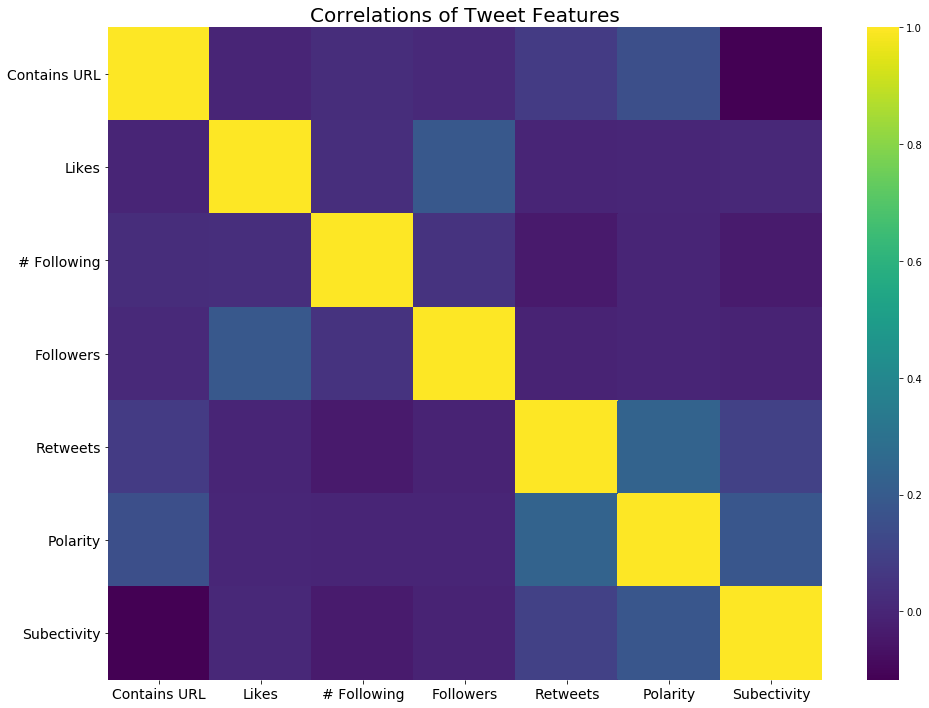

In [306]:
plt.figure(figsize = (16,12))
sns.heatmap(fullDF[['contains_url','favorite_count','following_count','followers_count','retweet_count','Polarity','Subjectivity']].corr(),
           cmap = 'viridis',
           xticklabels = ['Contains URL', 'Likes', '# Following', 'Followers', 'Retweets', 'Polarity','Subectivity'],
           yticklabels = ['Contains URL', 'Likes', '# Following', 'Followers', 'Retweets', 'Polarity','Subectivity'])

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14, rotation = 'horizontal')
plt.title('Correlations of Tweet Features', fontsize = 20)
plt.savefig('./img/corr');


# Create Dataframe for Tableau Map

In [138]:
map_data = pd.DataFrame()

In [139]:
map_data['total_tweets'] = fullDF.time_zone.value_counts()

In [140]:
map_data['Topic_0'] = fullDF[fullDF.topic_LDA==0].time_zone.value_counts()
map_data['Topic_1'] = fullDF[fullDF.topic_LDA==1].time_zone.value_counts()
map_data['Topic_2'] = fullDF[fullDF.topic_LDA==2].time_zone.value_counts()
map_data['Topic_3'] = fullDF[fullDF.topic_LDA==3].time_zone.value_counts()

In [141]:
map_data['Average_Polarity'] = fullDF.groupby('time_zone').Polarity.mean()
map_data['Average_Subjectivity'] = fullDF.groupby('time_zone').Subjectivity.mean()

In [142]:
map_data['country'] = None
map_data.head()

,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country
Pacific Time (US & Canada),24298,9041.0,2614.0,5628.0,7015.0,0.050557,0.337640,None
Eastern Time (US & Canada),17307,5866.0,1552.0,4749.0,5140.0,0.057097,0.356829,None
London,9779,3807.0,899.0,1708.0,3365.0,0.016082,0.370907,None
Central Time (US & Canada),9170,2984.0,978.0,2121.0,3087.0,0.074433,0.354156,None
Nairobi,4676,260.0,2961.0,1310.0,145.0,0.067591,0.162684,None


In [143]:
for t in map_data.index:
    map_data.loc[t,'average_retweets'] = fullDF[fullDF.time_zone == t].retweet_count.unique().mean()
    map_data.loc[t,'average_favorites'] = fullDF[fullDF.time_zone == t].favorite_count.unique().mean()

In [144]:
map_data.index.rename('time_zone', inplace = True)

In [145]:
map_data = map_data.reset_index()

In [222]:
map_data.loc[map_data.time_zone.str.contains('US|CST|EDT|PDT|PST|EST|International|Midway|MDT'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Hawaii|Honolulu'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Arizona'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('New_York'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Alaska'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Chicago'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Los_Angeles'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Denver|Detroit|Boise|Phoenix'),'country'] = 'United States'
map_data.loc[map_data.time_zone.str.contains('Atlantic'),'country'] = 'United States'

map_data.loc[map_data.time_zone.str.contains('London|GMT|BST'),'country'] = 'United Kingdom'
map_data.loc[map_data.time_zone.str.contains('Amsterdam'),'country'] = 'Netherlands'

map_data.loc[map_data.time_zone.str.contains('Brisbane'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Sydney'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Melbourne'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Adelaide'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Perth|GMT+8'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Canberra'),'country'] = 'Australia'
map_data.loc[map_data.time_zone.str.contains('Hobart|Darwin'),'country'] = 'Australia'

map_data.loc[map_data.time_zone.str.contains('Mexico|Tijuana|Chihuahua|Bahia|Central America|Indiana|Port_of_Spain|Monterrey|Mazat'),'country'] = 'Mexico'
map_data.loc[map_data.time_zone.str.contains('Paris'),'country'] = 'France'
map_data.loc[map_data.time_zone.str.contains('Dublin'),'country'] = 'Ireland'
map_data.loc[map_data.time_zone.str.contains('Bern'),'country'] = 'Switzerland'
map_data.loc[map_data.time_zone.str.contains('Berlin|Zurich'),'country'] = 'Germany'
map_data.loc[map_data.time_zone.str.contains('Madrid'),'country'] = 'Spain'
map_data.loc[map_data.time_zone.str.contains('Tokyo'),'country'] = 'Japan'
map_data.loc[map_data.time_zone.str.contains('Athens'),'country'] = 'Greece'
map_data.loc[map_data.time_zone.str.contains('Nairobi'),'country'] = 'Kenya'
map_data.loc[map_data.time_zone.str.contains('Casablanca'),'country'] = 'Morocco'
map_data.loc[map_data.time_zone.str.contains('Athens'),'country'] = 'Greece'
map_data.loc[map_data.time_zone.str.contains('Helsinki'),'country'] = 'Finland'
map_data.loc[map_data.time_zone.str.contains('Santiago'),'country'] = 'Chile'
map_data.loc[map_data.time_zone.str.contains('Baghdad'),'country'] = 'Iraq'
map_data.loc[map_data.time_zone.str.contains('Edinburgh'),'country'] = 'Scotland'
map_data.loc[map_data.time_zone.str.contains('Brussels'),'country'] = 'Belgium'
map_data.loc[map_data.time_zone.str.contains('Greenland'),'country'] = 'Greenland'
map_data.loc[map_data.time_zone.str.contains('Wellington|Auckland'),'country'] = 'New Zealand'
map_data.loc[map_data.time_zone.str.contains('Bangkok'),'country'] = 'Thailand'
map_data.loc[map_data.time_zone.str.contains('Kuala'),'country'] = 'Malaysia'
map_data.loc[map_data.time_zone.str.contains('Singapore'),'country'] = 'Singapore'
map_data.loc[map_data.time_zone.str.contains('Beijing|Chennai|Taipei|Urumqi'),'country'] = 'China'
map_data.loc[map_data.time_zone.str.contains('Hong'),'country'] = 'Hong Kong'
map_data.loc[map_data.time_zone.str.contains('Delhi|Mumbai|Kolkata|Calcut'),'country'] = 'India'
map_data.loc[map_data.time_zone.str.contains('Quito'),'country'] = 'Ecuador'
map_data.loc[map_data.time_zone.str.contains('Stockholm'),'country'] = 'Sweden'
map_data.loc[map_data.time_zone.str.contains('Brasilia'),'country'] = 'Brazil'
map_data.loc[map_data.time_zone.str.contains('Copenhagen'),'country'] = 'Denmark'
map_data.loc[map_data.time_zone.str.contains('Pretoria'),'country'] = 'South Africa'
map_data.loc[map_data.time_zone.str.contains('Tehran'),'country'] = 'Iran'
map_data.loc[map_data.time_zone.str.contains('Toronto|Edmonton|Montreal|Vancouver|Newfoundland|Halifax|Saskatchewan'),'country'] = 'Canada'
map_data.loc[map_data.time_zone.str.contains('Vienna'),'country'] = 'Austria'
map_data.loc[map_data.time_zone.str.contains('Lisbon|UTC'),'country'] = 'Portugal'
map_data.loc[map_data.time_zone.str.contains('Hanoi'),'country'] = 'Vietnam'
map_data.loc[map_data.time_zone.str.contains('Istanbul'),'country'] = 'Turkey'
map_data.loc[map_data.time_zone.str.contains('Jakarta'),'country'] = 'Indonesia'
map_data.loc[map_data.time_zone.str.contains('Cairo'),'country'] = 'Egypt'
map_data.loc[map_data.time_zone.str.contains('Dubai|Abu Dhabi'),'country'] = 'United Arab Emirates'
map_data.loc[map_data.time_zone.str.contains('Warsaw'),'country'] = 'Poland'
map_data.loc[map_data.time_zone.str.contains('Seoul'),'country'] = 'South Korea'
map_data.loc[map_data.time_zone.str.contains('Jerusalem'),'country'] = 'Israel'
map_data.loc[map_data.time_zone.str.contains('Fiji'),'country'] = 'Fiji'
map_data.loc[map_data.time_zone.str.contains('Buenos'),'country'] = 'Argentina'
map_data.loc[map_data.time_zone.str.contains('St. Petersburg|Moscow|Irkutsk|Yakutsk'),'country'] = 'Russia'
map_data.loc[map_data.time_zone.str.contains('Puerto'),'country'] = 'Puerto Rico'
map_data.loc[map_data.time_zone.str.contains('Manila'),'country'] = 'Phillipines'
map_data.loc[map_data.time_zone.str.contains('Johannesburg'),'country'] = 'South Africa'
map_data.loc[map_data.time_zone.str.contains('Budapest'),'country'] = 'Hungary'
map_data.loc[map_data.time_zone.str.contains('Solomon'),'country'] = 'Solomon Is.'
map_data.loc[map_data.time_zone.str.contains('Sri'),'country'] = 'Sri Lanka'
map_data.loc[map_data.time_zone.str.contains('Prague'),'country'] = 'Czech Republic'
map_data.loc[map_data.time_zone.str.contains('Ljub'),'country'] = 'Slovenia'
map_data.loc[map_data.time_zone.str.contains('Bogota'),'country'] = 'Columbia'
map_data.loc[map_data.time_zone.str.contains('Bucharest'),'country'] = 'Romania'
map_data.loc[map_data.time_zone.str.contains('Islamabad|Karachi'),'country'] = 'Pakistan'
map_data.loc[map_data.time_zone.str.contains('Caracas'),'country'] = 'Venezuela'
map_data.loc[map_data.time_zone.str.contains('Belgrade'),'country'] = 'Serbia'
map_data.loc[map_data.time_zone.str.contains('West Central'),'country'] = 'Kenya'
map_data.loc[map_data.time_zone.str.contains('Dhaka'),'country'] = 'Bangladesh'
map_data.loc[map_data.time_zone.str.contains('Minsk'),'country'] = 'Belarus'
map_data.loc[map_data.time_zone.str.contains('Kyiv|Kiev'),'country'] = 'Ukraine'
map_data.loc[map_data.time_zone.str.contains('Tbilisi'),'country'] = 'Georgia'
map_data.loc[map_data.time_zone.str.contains('New Caledonia'),'country'] = 'New Caledonia'
map_data.loc[map_data.time_zone.str.contains('Lima'),'country'] = 'Peru'
map_data.loc[map_data.time_zone.str.contains('Zagreb'),'country'] = 'Croatia'
map_data.loc[map_data.time_zone.str.contains('La Paz'),'country'] = 'Bolivia'
map_data.loc[map_data.time_zone.str.contains('Georgetown'),'country'] = 'Guyana'
map_data.loc[map_data.time_zone.str.contains('Bratislava'),'country'] = 'Slovakia'
map_data.loc[map_data.time_zone.str.contains('Riyadh'),'country'] = 'Saudi Arabia'
map_data.loc[map_data.time_zone.str.contains('Kathmandu'),'country'] = 'Nepal'
map_data.loc[map_data.time_zone.str.contains('Riga'),'country'] = 'Latvia'
map_data.loc[map_data.time_zone.str.contains('Kabul'),'country'] = 'Afghanistan'
map_data.loc[map_data.time_zone.str.contains('Nuku'),'country'] = 'Tonga'
map_data.loc[map_data.time_zone.str.contains('Harare'),'country'] = 'Zimbabwe'
map_data.loc[map_data.time_zone.str.contains('Algiers'),'country'] = 'Algeria'
map_data.loc[map_data.time_zone.str.contains('Kuwait'),'country'] = 'Kuwait'
map_data.loc[map_data.time_zone.str.contains('Dar_es'),'country'] = 'Tanzania'
map_data.loc[map_data.time_zone.str.contains('Kampala'),'country'] = 'Uganda'
map_data.loc[map_data.time_zone.str.contains('Baku'),'country'] = 'Azerbaijan'
map_data.loc[map_data.time_zone.str.contains('Rangoon'),'country'] = 'Myanmar'
map_data.loc[map_data.time_zone.str.contains('Monrovia'),'country'] = 'Liberia'
map_data.loc[map_data.time_zone.str.contains('Almaty'),'country'] = 'Kazakhstan'
map_data.loc[map_data.time_zone.str.contains('Lagos|CAT'),'country'] = 'Nigeria'
map_data.loc[map_data.time_zone.str.contains('Guam'),'country'] = 'Guam'
map_data.loc[map_data.time_zone.str.contains('Tallinn'),'country'] = 'Tallinn'
map_data.loc[map_data.time_zone.str.contains('Samoa'),'country'] = 'Samoa'
map_data.loc[map_data.time_zone.str.contains('Ekaterinburg|Volgograd'),'country'] = 'Russia'
map_data.loc[map_data.time_zone.str.contains('Krasnoyarsk'),'country'] = 'Russia'
map_data.loc[map_data.time_zone.str.contains('Muscat'),'country'] = 'Oman'
map_data.loc[map_data.time_zone.str.contains('Oslo'),'country'] = 'Norway'
map_data.loc[map_data.time_zone.str.contains('Ulaan Bataar'),'country'] = 'Mongolia'
map_data.loc[map_data.time_zone.str.contains('Osaka'),'country'] = 'Japan'
map_data.loc[map_data.time_zone.str.contains('Belem'),'country'] = 'Brazil'
map_data.loc[map_data.time_zone.str.contains('Azores'),'country'] = 'Portugal'
map_data.loc[map_data.time_zone.str.contains('Skopje'),'country'] = 'Macedonia'
map_data.loc[map_data.time_zone.str.contains('Sofia'),'country'] = 'Bulgaria'
map_data.loc[map_data.time_zone.str.contains('Vilnius'),'country'] = 'Lithuania'
map_data.loc[map_data.time_zone.str.contains('Dawson'),'country'] = 'Canada'
map_data.loc[map_data.time_zone.str.contains('Astana'),'country'] = 'Kazakhstan'
map_data.loc[map_data.time_zone.str.contains('Tegucigalpa'),'country'] = 'Honduras'
map_data.loc[map_data.time_zone.str.contains('Rome'),'country'] = 'Italy'

In [225]:
map_data.head()

,time_zone,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country,average_retweets,average_favorites
0,Pacific Time (US & Canada),24298,9041.0,2614.0,5628.0,7015.0,0.050557,0.337640,United States,1055.740214,431.448718
1,Eastern Time (US & Canada),17307,5866.0,1552.0,4749.0,5140.0,0.057097,0.356829,United States,618.716738,192.225490
2,London,9779,3807.0,899.0,1708.0,3365.0,0.016082,0.370907,United Kingdom,352.886486,47.200000
3,Central Time (US & Canada),9170,2984.0,978.0,2121.0,3087.0,0.074433,0.354156,United States,603.891775,47.720930
4,Nairobi,4676,260.0,2961.0,1310.0,145.0,0.067591,0.162684,Kenya,233.460526,438.804878


In [228]:
map_data2 = pd.DataFrame()

In [233]:
np.array([1,2])*np.array([2,3])

array([2, 6])

In [243]:
ind_total_tweets = np.array(map_data[map_data.country == "United Kingdom"].total_tweets)

In [ ]:
ind_avg_retweets = np.array(map_data[map_data.country == "United Kingdom"].average_retweets)
total_tweets = map_data[map_data.country == "United Kingdom"].total_tweets.sum()

In [248]:
print(ind_total_tweets, ind_avg_tweets, total_tweets)

[9779  782   35   14    8    1] [ 352.88648649  360.79452055   87.63636364 1239.15384615   48.
    0.        ] 10619


In [249]:
(ind_total_tweets * ind_avg_tweets).sum() / total_tweets

353.50011234516165

In [258]:
countries =[]
total = []
topic0 = []
topic1 = []
topic2 = []
topic3 = []
avg_retweets = []
avg_favorites = []
avg_polarity = []
avg_subjectivity = []


for country in map_data.country.unique():
    
    ind_total_tweets = np.array(map_data[map_data.country == country].total_tweets)
    ind_avg_retweets = np.array(map_data[map_data.country == country].average_retweets)
    ind_avg_favorites = np.array(map_data[map_data.country == country].average_favorites)
    ind_avg_Polarity = np.array(map_data[map_data.country == country].Average_Polarity)
    ind_avg_Subjectivity = np.array(map_data[map_data.country == country].Average_Subjectivity)
    total_tweets = map_data[map_data.country == country].total_tweets.sum()
    
    countries.append(country)
    total.append(map_data[map_data.country == country].total_tweets.sum())
    topic0.append(map_data[map_data.country == country].Topic_0.sum())
    topic1.append(map_data[map_data.country == country].Topic_1.sum())
    topic2.append(map_data[map_data.country == country].Topic_2.sum())
    topic3.append(map_data[map_data.country == country].Topic_3.sum())
    avg_retweets.append((ind_total_tweets * ind_avg_retweets).sum() / total_tweets)
    avg_favorites.append((ind_total_tweets * ind_avg_favorites).sum() / total_tweets)
    avg_polarity.append((ind_total_tweets * ind_avg_Polarity).sum() / total_tweets)
    avg_subjectivity.append((ind_total_tweets * ind_avg_Subjectivity).sum() / total_tweets)
    

In [264]:
map_data2['Country'] = countries
map_data2['Total Tweets'] = total
map_data2['Topic 0'] = topic0
map_data2['Topic 1'] = topic1
map_data2['Topic 2'] = topic2
map_data2['Topic 3'] = topic3
map_data2['Average Retweets'] = avg_retweets
map_data2['Average Favorites'] = avg_favorites
map_data2['Average Polarity'] = avg_polarity
map_data2['Average Subjectivity'] = avg_subjectivity

In [267]:
map_data2.sort_values('Average Polarity', ascending = False)

,Country,Total Tweets,Topic 0,Topic 1,Topic 2,Topic 3,Average Retweets,Average Favorites,Average Polarity,Average Subjectivity
92,Lithuania,1,1.0,0.0,0.0,0.0,33.000000,0.000000,0.500000,0.500000
86,Mongolia,7,0.0,0.0,0.0,7.0,10.500000,0.000000,0.450000,0.500000
70,Solomon Is.,21,16.0,0.0,0.0,5.0,10.666667,2.000000,0.427381,0.748214
82,Guam,10,0.0,0.0,10.0,0.0,0.000000,1.000000,0.400000,0.375000
77,Myanmar,13,0.0,0.0,0.0,13.0,138.000000,0.000000,0.392857,0.517857
74,Uganda,14,0.0,0.0,0.0,14.0,138.000000,0.000000,0.392857,0.517857
47,Vietnam,116,24.0,11.0,11.0,70.0,903.608696,0.500000,0.307974,0.269282
91,Phillipines,2,1.0,0.0,1.0,0.0,378.500000,0.000000,0.300000,0.475000
93,Honduras,1,0.0,0.0,1.0,0.0,11.000000,0.000000,0.250000,0.250000
79,Liberia,12,0.0,0.0,8.0,4.0,24.000000,0.500000,0.241111,0.390000


In [268]:
map_data2.to_csv('climatetweets_map.csv')

In [149]:
np.mean(fullDF.retweet_count.unique())

985.4771428571429

In [150]:
pivot = pd.DataFrame()
for c in map_data.country.unique():
    print(map_data[map_data.country == c])
    print('--')

                        time_zone  total_tweets  Topic_0  Topic_1  Topic_2  \
0    Pacific Time (US & Canada)    24298         9041.0   2614.0   5628.0    
1    Eastern Time (US & Canada)    17307         5866.0   1552.0   4749.0    
3    Central Time (US & Canada)    9170          2984.0   978.0    2121.0    
7    Mountain Time (US & Canada)   3019          1337.0   238.0    641.0     
8    Atlantic Time (Canada)        1832          657.0    145.0    501.0     
10   Hawaii                        1254          384.0    126.0    315.0     
11   Arizona                       1221          401.0    149.0    343.0     
19   America/New_York              700           280.0    18.0     239.0     
23   Alaska                        632           218.0    80.0     162.0     
33   America/Chicago               417           172.0    50.0     108.0     
41   America/Los_Angeles           287           105.0    29.0     85.0      
49   Mid-Atlantic                  198           117.0    10.0  

In [151]:
map_data

,time_zone,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country,average_retweets,average_favorites
0,Pacific Time (US & Canada),24298,9041.0,2614.0,5628.0,7015.0,0.050557,0.337640,United States,1055.740214,431.448718
1,Eastern Time (US & Canada),17307,5866.0,1552.0,4749.0,5140.0,0.057097,0.356829,United States,618.716738,192.225490
2,London,9779,3807.0,899.0,1708.0,3365.0,0.016082,0.370907,United Kingdom,352.886486,47.200000
3,Central Time (US & Canada),9170,2984.0,978.0,2121.0,3087.0,0.074433,0.354156,United States,603.891775,47.720930
4,Nairobi,4676,260.0,2961.0,1310.0,145.0,0.067591,0.162684,Kenya,233.460526,438.804878
5,Quito,3134,661.0,880.0,905.0,688.0,0.062663,0.309441,Ecuador,518.697917,14.647059
6,Amsterdam,3022,1240.0,390.0,431.0,961.0,0.036250,0.369962,Netherlands,361.152866,83.416667
7,Mountain Time (US & Canada),3019,1337.0,238.0,641.0,803.0,0.030376,0.333457,United States,704.701657,33.291667
8,Atlantic Time (Canada),1832,657.0,145.0,501.0,529.0,0.041577,0.350897,United States,596.323864,5.800000
9,Sydney,1285,736.0,77.0,216.0,256.0,-0.005781,0.331221,Australia,410.847458,10.428571


In [152]:
#map_data['average_retweets'] = np.mean(fullDF[fullDF.topic_LDA == t].retweet_count.unique())

In [153]:
#country = 'United States'

In [154]:
map_data.head()

,time_zone,total_tweets,Topic_0,Topic_1,Topic_2,Topic_3,Average_Polarity,Average_Subjectivity,country,average_retweets,average_favorites
0,Pacific Time (US & Canada),24298,9041.0,2614.0,5628.0,7015.0,0.050557,0.337640,United States,1055.740214,431.448718
1,Eastern Time (US & Canada),17307,5866.0,1552.0,4749.0,5140.0,0.057097,0.356829,United States,618.716738,192.225490
2,London,9779,3807.0,899.0,1708.0,3365.0,0.016082,0.370907,United Kingdom,352.886486,47.200000
3,Central Time (US & Canada),9170,2984.0,978.0,2121.0,3087.0,0.074433,0.354156,United States,603.891775,47.720930
4,Nairobi,4676,260.0,2961.0,1310.0,145.0,0.067591,0.162684,Kenya,233.460526,438.804878


# Clustering Topics

In [155]:
all_doc_topics

array([[0.02533316, 0.12500954, 0.0250001 , 0.8246572 ],
       [0.53203792, 0.05935108, 0.22580302, 0.18280798],
       [0.05349927, 0.05000167, 0.82146216, 0.0750369 ],
       ...,
       [0.35854307, 0.10946129, 0.1866725 , 0.34532314],
       [0.6224026 , 0.0178831 , 0.25731268, 0.10240161],
       [0.39901669, 0.11434367, 0.08260465, 0.40403499]])

In [156]:
from sklearn.metrics import silhouette_score

In [157]:
sample_doc_topics = pd.DataFrame()
for i in range(4):

    sample_doc_topics = pd.concat([sample_doc_topics, pd.DataFrame(all_doc_topics[fullDF.topic_LDA == i]).sample(2000)])


In [158]:
sample_doc_topics.shape

(8000, 4)

In [159]:
SSEs = []
Sil_coefs = []

for k in tqdm(range(2,20)):
    km = KMeans(n_clusters=k, random_state=1, init='k-means++')
    km.fit(sample_doc_topics)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(sample_doc_topics,labels, metric='euclidean'))
    #SSEs.append(get_SSE(sample_tfidf.T, labels)) # The SSE is just inertia, we
                                           # could have just said km.inertia_
    SSEs.append(km.inertia_)

100%|██████████| 18/18 [00:35<00:00,  2.00s/it]


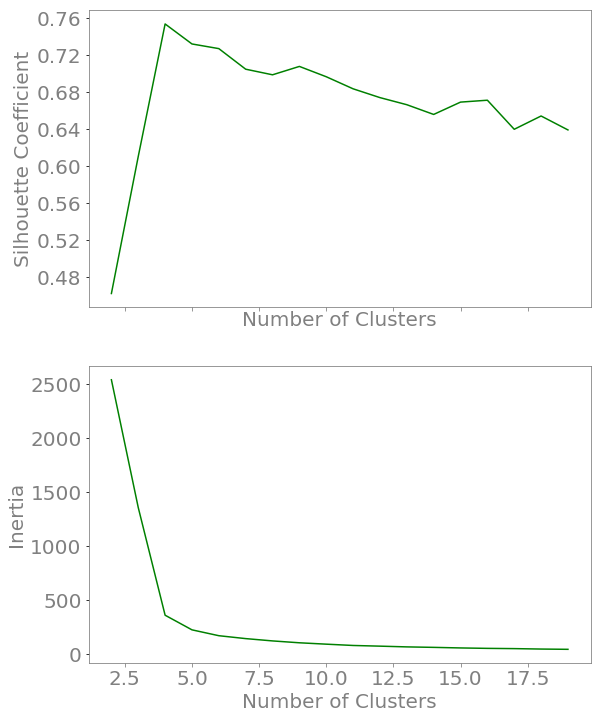

''

In [194]:
from matplotlib.ticker import MaxNLocator

# number of clusters for kmeans
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,12), sharex=True)

k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs, color = 'green')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Coefficient')

ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax1.spines['bottom'].set_color('gray')
ax1.spines['top'].set_color('gray')
ax1.spines['right'].set_color('gray')
ax1.spines['left'].set_color('gray')
ax1.xaxis.label.set_color('gray')



ax1.tick_params(axis='x', colors='gray')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(20)
    item.set_color('gray')
    
ax1.title.set_color('black')



# Sum of Square Error
ax2.plot(k_clusters, SSEs, color = 'green')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')


ax2.spines['bottom'].set_color('gray')
ax2.spines['top'].set_color('gray')
ax2.spines['right'].set_color('gray')
ax2.spines['left'].set_color('gray')
ax2.xaxis.label.set_color('gray')



ax2.tick_params(axis='x', colors='gray')
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(20)
    item.set_color('gray')
    
ax2.title.set_color('black')

plt.savefig('./img/silhouette_inertia',bbox_inches= 'tight')
plt.show()

;

In [161]:
km.labels_.shape

(8000,)

In [162]:
km = KMeans(n_clusters=8, random_state=1, init='k-means++')
clustered = km.fit_predict(sample_doc_topics)

In [163]:
pd.DataFrame(clustered)[0].value_counts()

4    1861
3    1570
2    1562
0    1203
7    557 
6    542 
5    483 
1    222 
Name: 0, dtype: int64